# Student Performance Project
- **Nama:** Ahmad Sabil Deva Pratama
- **Email:** devapratama4912@gmail.com
- **ID Dicoding:** devaprtm49

# **1. Menyiapkan Library**
Pada bagian ini, kita akan mengimpor semua library yang diperlukan untuk eksplorasi data dan analisis.


In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and feature engineering
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import category_encoders as ce

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

# Model selection and training
from sklearn.model_selection import train_test_split, GridSearchCV

# Machine learning algorithms
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Handle class imbalance
from imblearn.over_sampling import SMOTE

# Save models
import joblib

# Mengatur tampilan untuk melihat semua kolom pada DataFrame
pd.set_option('display.max_columns', None)

# **2. Data Understanding**
Langkah ini bertujuan untuk memahami struktur data dan kualitasnya.
Kita akan memeriksa:
1. **Deskripsi Data**: Untuk melihat deskripsi statistik dan informasi dari dataset.
2. **Data Hygiene**: Untuk mengidentifikasi data yang terduplikasi dan atau data yang hilang.
3. **Exploratory Data Analysis (EDA)**: Fokus pada analisis yang relevan dengan metric seperti Dropout Rate dan Academic Performance Index.


## **2.1. Membaca Data**

In [3]:
data = pd.read_csv('data.csv', delimiter=';')
print("Dimensi dataset:", data.shape)
data.head()

Dimensi dataset: (4424, 37)


,Marital_status,Application_mode,Application_order,Course,Daytime_evening_attendance,Previous_qualification,Previous_qualification_grade,Nacionality,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP,Status
0,1,17,5,171,1,1,122.0,1,19,12,5,9,127.3,1,0,0,1,1,0,20,0,0,0,0,0,0.000000,0,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,3,3,142.5,1,0,0,0,1,0,19,0,0,6,6,6,14.000000,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,9,9,124.8,1,0,0,0,1,0,19,0,0,6,0,0,0.000000,0,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,5,3,119.6,1,0,0,1,0,0,20,0,0,6,8,6,13.428571,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,9,9,141.5,0,0,0,1,0,0,45,0,0,6,9,5,12.333333,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


Dataset terdiri dari 4424 baris dan 37 kolom. Di atas adalah isi dari 5 baris teratas.

## **2.2. Deskripsi Data**

In [4]:
# Menampilkan informasi tentang dataset
print("Informasi Dataset:")
print(data.info())

Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Marital_status                                4424 non-null   int64  
 1   Application_mode                              4424 non-null   int64  
 2   Application_order                             4424 non-null   int64  
 3   Course                                        4424 non-null   int64  
 4   Daytime_evening_attendance                    4424 non-null   int64  
 5   Previous_qualification                        4424 non-null   int64  
 6   Previous_qualification_grade                  4424 non-null   float64
 7   Nacionality                                   4424 non-null   int64  
 8   Mothers_qualification                         4424 non-null   int64  
 9   Fathers_qualification                       

Dataset ini berisi informasi mengenai karakteristik demografis, akademik, dan sosial ekonomi mahasiswa, termasuk status pernikahan, tingkat pendidikan orang tua, pekerjaan orang tua, program studi yang diambil, beasiswa, dan informasi terkait keuangan dan sosial. Target variabel adalah status mahasiswa pada akhir studi, yaitu apakah mereka drop out, masih terdaftar, atau lulus.

Dataset ini dapat digunakan untuk menganalisis faktor-faktor yang memengaruhi keberhasilan mahasiswa dalam menyelesaikan studi mereka dan untuk membangun model prediksi untuk mengidentifikasi kemungkinan mahasiswa yang berisiko drop-out.

Berikut adalah kolom beserta penjelasan dari dataset:

1. **Marital Status** (Integer): Menunjukkan status pernikahan mahasiswa dengan kode numerik:
   - 1: Single
   - 2: Married
   - 3: Widower
   - 4: Divorced
   - 5: Facto union
   - 6: Legally separated

2. **Application Mode** (Integer): Menunjukkan mode aplikasi yang digunakan oleh mahasiswa. Kode numerik seperti:
   - 1: 1st phase - general contingent
   - 2: Ordinance No. 612/93
   - 5: 1st phase - special contingent (Azores Island)
   - 15: International student (bachelor)
   - 39: Over 23 years old

3. **Application Order** (Integer): Urutan pilihan aplikasi mahasiswa (0 - pertama hingga 9 - terakhir).

4. **Course** (Integer): Kode program studi yang dipilih mahasiswa. Kode-kode program studi seperti:
   - 33: Biofuel Production Technologies
   - 171: Animation and Multimedia Design
   - 8014: Social Service (evening attendance)
   - 9003: Agronomy

5. **Daytime/Evening Attendance** (Integer): Waktu kuliah mahasiswa, dengan nilai:
   - 1: Daytime
   - 0: Evening

6. **Previous Qualification** (Integer): Jenjang pendidikan sebelumnya yang dimiliki mahasiswa, dengan kode seperti:
   - 1: Secondary education
   - 2: Higher education - bachelor's degree
   - 3: Higher education - degree
   - 4: Higher education - master's

7. **Previous Qualification (Grade)** (Continuous): Nilai atau grade dari kualifikasi sebelumnya, berada dalam rentang 0 hingga 200.

8. **Nationality** (Integer): Kode kewarganegaraan mahasiswa, seperti:
   - 1: Portuguese
   - 2: German
   - 41: Brazilian
   - 62: Romanian

9. **Mother's Qualification** (Integer): Tingkat pendidikan ibu mahasiswa, dengan kode seperti:
   - 1: Secondary Education
   - 2: Higher Education - Bachelor's Degree
   - 3: Higher Education - Degree
   - 4: Higher Education - Master's

10. **Father's Qualification** (Integer): Tingkat pendidikan ayah mahasiswa, dengan kode yang sama seperti kualifikasi ibu.

11. **Mother's Occupation** (Integer): Kode profesi ibu mahasiswa, dengan kode seperti:
   - 0: Student
   - 1: Representatives of Legislative and Executive Bodies, Directors
   - 2: Specialists in Intellectual and Scientific Activities
   - 122: Health professionals
   - 123: Teachers

12. **Father's Occupation** (Integer): Kode profesi ayah mahasiswa, dengan kode seperti:
   - 0: Student
   - 1: Representatives of Legislative and Executive Bodies, Directors
   - 2: Specialists in Intellectual and Scientific Activities
   - 122: Health professionals
   - 123: Teachers

13. **Admission Grade** (Continuous): Nilai penerimaan mahasiswa, berkisar antara 0 hingga 200.

14. **Displaced** (Integer): Status perpindahan mahasiswa.
   - 1: Yes
   - 0: No

15. **Educational Special Needs** (Integer): Menunjukkan apakah mahasiswa memiliki kebutuhan pendidikan khusus.
   - 1: Yes
   - 0: No

16. **Debtor** (Integer): Menunjukkan apakah mahasiswa memiliki hutang.
   - 1: Yes
   - 0: No

17. **Tuition Fees Up to Date** (Integer): Menunjukkan apakah pembayaran uang kuliah mahasiswa sudah diperbarui.
   - 1: Yes
   - 0: No

18. **Gender** (Integer): Jenis kelamin mahasiswa.
   - 1: Male
   - 0: Female

19. **Scholarship Holder** (Integer): Menunjukkan apakah mahasiswa menerima beasiswa.
   - 1: Yes
   - 0: No

20. **Age at Enrollment** (Integer): Umur mahasiswa saat pendaftaran.

21. **International** (Integer): Menunjukkan apakah mahasiswa adalah mahasiswa internasional.
   - 1: Yes
   - 0: No

22. **Curricular Units 1st Sem (Credited)** (Integer): Jumlah mata kuliah yang telah dikreditkan di semester 1.

23. **Curricular Units 1st Sem (Enrolled)** (Integer): Jumlah mata kuliah yang diambil di semester 1.

24. **Curricular Units 1st Sem (Evaluations)** (Integer): Jumlah evaluasi yang diambil di semester 1.

25. **Curricular Units 1st Sem (Approved)** (Integer): Jumlah mata kuliah yang disetujui di semester 1.

26. **Curricular Units 1st Sem (Grade)** (Integer): Rata-rata nilai mata kuliah di semester 1 (antara 0 hingga 20).

27. **Curricular Units 1st Sem (Without Evaluations)** (Integer): Jumlah mata kuliah yang tidak dievaluasi di semester 1.

28. **Curricular Units 2nd Sem (Credited)** (Integer): Jumlah mata kuliah yang telah dikreditkan di semester 2.

29. **Curricular Units 2nd Sem (Enrolled)** (Integer): Jumlah mata kuliah yang diambil di semester 2.

30. **Curricular Units 2nd Sem (Evaluations)** (Integer): Jumlah evaluasi yang diambil di semester 2.

31. **Curricular Units 2nd Sem (Approved)** (Integer): Jumlah mata kuliah yang disetujui di semester 2.

32. **Curricular Units 2nd Sem (Grade)** (Integer): Rata-rata nilai mata kuliah di semester 2 (antara 0 hingga 20).

33. **Curricular Units 2nd Sem (Without Evaluations)** (Integer): Jumlah mata kuliah yang tidak dievaluasi di semester 2.

34. **Unemployment Rate** (Continuous): Tingkat pengangguran (%).

35. **Inflation Rate** (Continuous): Tingkat inflasi (%).

36. **GDP** (Continuous): Produk Domestik Bruto (GDP).

37. **Target** (Categorical): Status mahasiswa setelah menyelesaikan masa studi, yang termasuk:
   - Dropout
   - Enrolled
   - Graduate

Terdapat kolom yang seharusnya kategorik, tapi malah terdeteksi numerik, sehingga perlu dilakukan perubahan tipe data.

In [5]:
categorical_columns = [
    "Marital_status", "Application_mode", "Application_order", "Course",
    "Previous_qualification", "Nacionality"
]

# Mengubah tipe data yang seharusnya kategorik
for col in categorical_columns:
    if col in data.columns:
        data[col] = data[col].astype('object')

# Deskripsi statistik untuk kolom numerik
print("Deskripsi Data Numerik:")
data.describe(include=['number'])

Deskripsi Data Numerik:


,Daytime_evening_attendance,Previous_qualification_grade,Mothers_qualification,Fathers_qualification,Mothers_occupation,Fathers_occupation,Admission_grade,Displaced,Educational_special_needs,Debtor,Tuition_fees_up_to_date,Gender,Scholarship_holder,Age_at_enrollment,International,Curricular_units_1st_sem_credited,Curricular_units_1st_sem_enrolled,Curricular_units_1st_sem_evaluations,Curricular_units_1st_sem_approved,Curricular_units_1st_sem_grade,Curricular_units_1st_sem_without_evaluations,Curricular_units_2nd_sem_credited,Curricular_units_2nd_sem_enrolled,Curricular_units_2nd_sem_evaluations,Curricular_units_2nd_sem_approved,Curricular_units_2nd_sem_grade,Curricular_units_2nd_sem_without_evaluations,Unemployment_rate,Inflation_rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,0.890823,132.613314,19.561935,22.275316,10.960895,11.032324,126.978119,0.548373,0.011528,0.113698,0.880651,0.351718,0.248418,23.265145,0.024864,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,11.566139,1.228029,0.001969
std,0.311897,13.188332,15.603186,15.343108,26.418253,25.263040,14.482001,0.497711,0.106760,0.317480,0.324235,0.477560,0.432144,7.587816,0.155729,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,2.663850,1.382711,2.269935
min,0.000000,95.000000,1.000000,1.000000,0.000000,0.000000,95.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.600000,-0.800000,-4.060000
25%,1.000000,125.000000,2.000000,3.000000,4.000000,4.000000,117.900000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,19.000000,0.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,9.400000,0.300000,-1.700000
50%,1.000000,133.100000,19.000000,19.000000,5.000000,7.000000,126.100000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,20.000000,0.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,11.100000,1.400000,0.320000
75%,1.000000,140.000000,37.000000,37.000000,9.000000,9.000000,134.800000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,25.000000,0.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,13.900000,2.600000,1.790000
max,1.000000,190.000000,44.000000,44.000000,194.000000,195.000000,190.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,70.000000,1.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,16.200000,3.700000,3.510000


Data di atas menunjukkan bahwa sebagian besar mahasiswa berusia sekitar 23 tahun, dengan mayoritas memilih sesi malam untuk kuliah. Kualifikasi orang tua sebagian besar beragam, dengan rata-rata pendidikan ibu dan ayah sekitar 19 dan 22 tahun. Sekitar 25% mahasiswa menerima beasiswa, dan sebagian besar membayar biaya kuliah tepat waktu. Dalam hal akademik, mahasiswa rata-rata memperoleh sekitar 6 kredit per semester, meskipun terdapat variasi dalam jumlah evaluasi dan kelulusan. Indikator ekonomi seperti tingkat pengangguran, inflasi, dan GDP menunjukkan fluktuasi yang signifikan, mencerminkan kondisi ekonomi yang berubah-ubah.

In [6]:
# Deskripsi untuk kolom kategorik
print("\nDeskripsi Data Kategorik:")
data.describe(include=['object'])


Deskripsi Data Kategorik:


,Marital_status,Application_mode,Application_order,Course,Previous_qualification,Nacionality,Status
count,4424,4424,4424,4424,4424,4424,4424
unique,6,18,8,17,17,21,3
top,1,1,1,9500,1,1,Graduate
freq,3919,1708,3026,766,3717,4314,2209


- Marital Status: Mayoritas mahasiswa berstatus single (kode 1), dengan frekuensi 3919 dari 4424.
- Application Mode: Mode aplikasi yang paling umum adalah 1 (1st phase - general contingent), yang dipilih oleh 1708 mahasiswa.
- Application Order: Urutan aplikasi yang paling banyak muncul adalah 1 (pilihan pertama) dengan 3026 mahasiswa memilihnya.
- Course: Kursus yang paling banyak dipilih adalah 9500 (Nursing) dengan 766 mahasiswa.
- Previous Qualification: Mayoritas mahasiswa memiliki kualifikasi 1 (Secondary education), dengan 3717 mahasiswa.
- Nationality: Sebagian besar mahasiswa berasal dari Portugal (kode 1), dengan 4314 mahasiswa.
- Status: Status akhir mahasiswa yang paling banyak tercatat adalah Graduate (2209 mahasiswa).

In [7]:
data["Status"].value_counts()

,count
Status,
Graduate,2209
Dropout,1421
Enrolled,794


Distribusi dari kolom Status yang menjadi target/label dari project ini tidak seimbang, sehingga perlu dilakukan oversampling agar datanya seimbang untuk tahap modeling nanti.

## **2.3. Data Hygiene**

### **2.3.1. Analisis Data Duplikat**


In [8]:
print("Jumlah duplikat:", data.duplicated().sum())

Jumlah duplikat: 0


Tidak ada duplikat dari dataset.

### **2.3.2. Analisis Missing Value**


In [9]:
missing_values = data.isnull().sum()
missing_percentage = (missing_values / len(data)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data['Percentage'] = missing_data['Percentage'].round(2)
print("Jumlah dan Persentase Missing Values per Kolom:\n\n", missing_data)

Jumlah dan Persentase Missing Values per Kolom:

                                               Missing Values  Percentage
Marital_status                                             0         0.0
Application_mode                                           0         0.0
Application_order                                          0         0.0
Course                                                     0         0.0
Daytime_evening_attendance                                 0         0.0
Previous_qualification                                     0         0.0
Previous_qualification_grade                               0         0.0
Nacionality                                                0         0.0
Mothers_qualification                                      0         0.0
Fathers_qualification                                      0         0.0
Mothers_occupation                                         0         0.0
Fathers_occupation                                         0         0.0
A

Tidak ada kolom yang memiliki nilai yang hilang/kosong, sehingga tidak diperlukan preprocessing untuk mengatasi nilai yang hilang/kosong.

## **2.4. Exploratory Data Analysis (EDA)**

EDA adalah langkah penting untuk memahami data dan mendapatkan insight yang relevan dengan tujuan perusahaan. Fokus utama adalah menganalisis dua metrik: Drop Out Rate dan Academic Performance Index.


### **1. Dropout Rate (Tingkat Dropout):**
Dropout Rate adalah persentase mahasiswa yang keluar pada periode tertentu.

#### **Formula:**
$$
\text{Dropout Rate} = \frac{\text{Jumlah Siswa Dropout}}{\text{Jumlah Siswa Total}} \times 100\%
$$

### **2. Academic Performance Index (Indeks Kinerja Akademik):**
Academic Performance Index adalah rata-rata nilai keseluruhan dari semua mahasiswa.

#### **Formula:**
$$
\text{API} = \frac{\text{Total Nilai Semester 1 + Total Nilai Semester 2}}{\text{Jumlah Mata Kuliah Terdaftar Semester 1 + Semester 2}}
$$

### **2.4.1. Dropout Rate**
Analisis yang dilakukan adalah:
1. Menghitung persentase mahasiswa yang keluar.
2. Menganalisis distribusi dropout berdasarkan Debtor.
3. Melihat distribusi dropout berdasarkan Educational special needs.
4. Melihat distribusi dropout berdasarkan International.



#### **Persentase Dropout Rate**

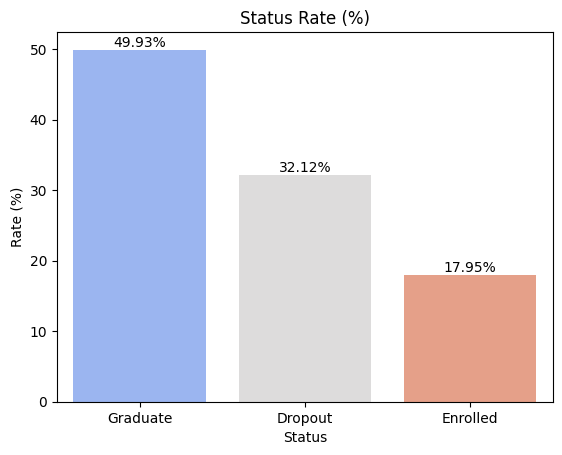

In [10]:
dropout_rate_by_status = data['Status'].value_counts(normalize=True) * 100

sns.barplot(x=dropout_rate_by_status.index, y=dropout_rate_by_status.values, hue=dropout_rate_by_status.index, palette="coolwarm")
for i, value in enumerate(dropout_rate_by_status.values):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')
plt.title("Status Rate (%)")
plt.xlabel("Status")
plt.ylabel("Rate (%)")
plt.show()

Dari visualisasi di atas terlihat bahwa ada 32.12% student yang dropout dari total 4424 student. Kemudian sekitar 49.93% student graduate dan 17.95% student dengan status enrolled.

#### **Dropout by Debtor**

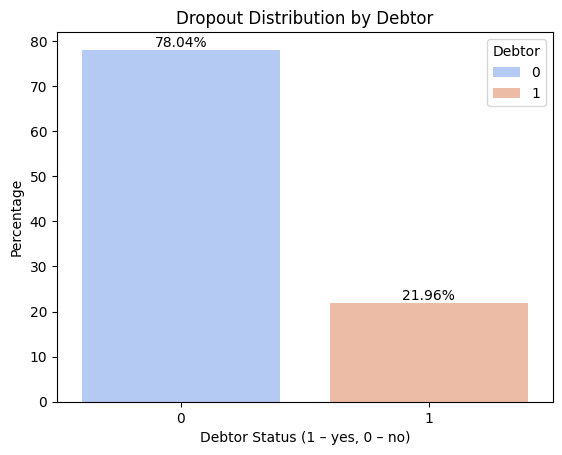

In [11]:
debtor_dropout = data[data['Status'] == 'Dropout']['Debtor'].value_counts(normalize=True) * 100
sns.barplot(x=debtor_dropout.index, y=debtor_dropout.values, hue=debtor_dropout.index, palette="coolwarm")
for i, value in enumerate(debtor_dropout.values):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')
plt.title('Dropout Distribution by Debtor')
plt.xlabel('Debtor Status (1 – yes, 0 – no)')
plt.ylabel('Percentage')
plt.show()

Dari visualisasi di atas terlihat bahwa student yang dropout sekitar 78.04% nya adalah yang tidak memiliki hutang. Dengan 21.96% student dropout yang memiliki hutang. Artinya 1/5 student yang dropout memiliki hutang.

#### Dropout by Educational Special Needs

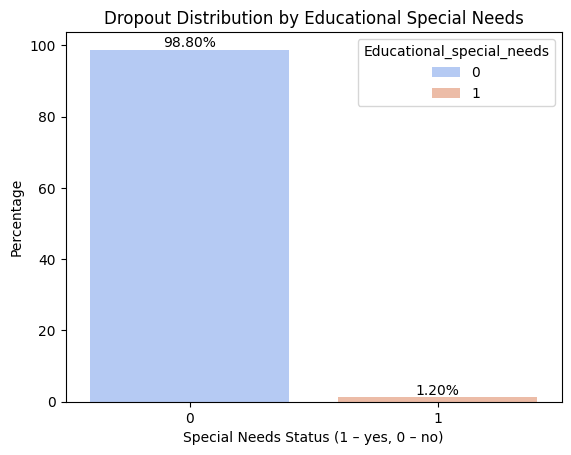

In [12]:
special_needs_dropout = data[data['Status'] == 'Dropout']['Educational_special_needs'].value_counts(normalize=True) * 100
sns.barplot(x=special_needs_dropout.index, y=special_needs_dropout.values, hue=special_needs_dropout.index, palette="coolwarm")
for i, value in enumerate(special_needs_dropout.values):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')
plt.title('Dropout Distribution by Educational Special Needs')
plt.xlabel('Special Needs Status (1 – yes, 0 – no)')
plt.ylabel('Percentage')
plt.show()

Dari visualisasi di atas terlihat bahwa student yang dropout sekitar 98.80% nya adalah yang bukan berkebutuhan khusus. Dengan hanya 1.20% student berkebutuhan khusus yang dropout.

#### Dropout by International Status

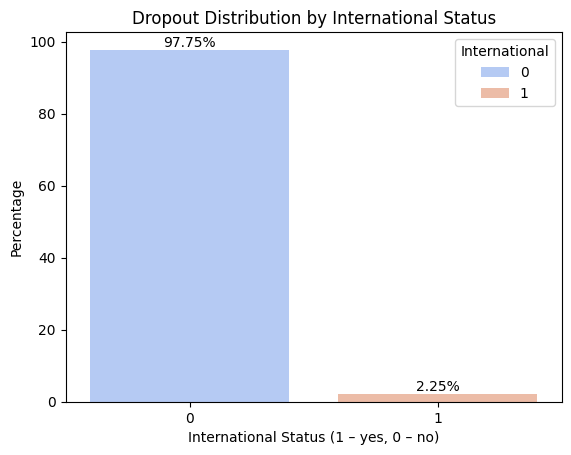

In [13]:
international_dropout = data[data['Status'] == 'Dropout']['International'].value_counts(normalize=True) * 100
sns.barplot(x=international_dropout.index, y=international_dropout.values, hue=international_dropout.index, palette="coolwarm")
for i, value in enumerate(international_dropout.values):
    plt.text(i, value, f'{value:.2f}%', ha='center', va='bottom')
plt.title('Dropout Distribution by International Status')
plt.xlabel('International Status (1 – yes, 0 – no)')
plt.ylabel('Percentage')
plt.show()

Dari visualisasi di atas terlihat student yang dropout sebanyak 97.75% adalah student yang bukan dari international. Dengan hanya 2.25% student international yang dropout.

### **2.4.2. Academic Performance Index (Indeks Kinerja Akademik)**
Analisis yang dilakukan adalah:
1. Menghitung rata-rata nilai semua mahasiswa.
2. Menganalisis distribusi Academic Performance Index berdasarkan Status.
3. Melihat distribusi Academic Performance Index berdasarkan Admission_grade.
4. Melihat distribusi Academic Performance Index berdasarkan Daytime_evening_attendance.


#### Academic Performance Index Distribution

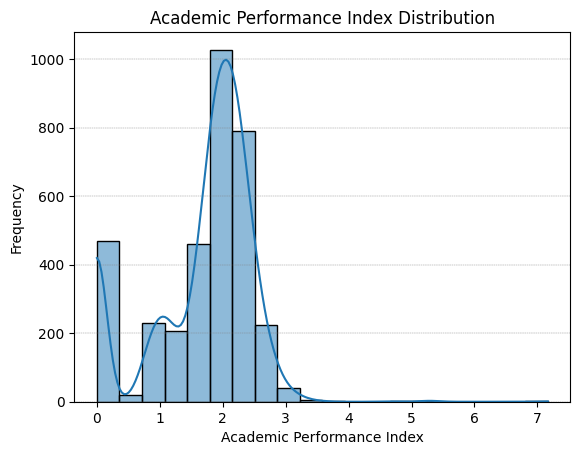

In [14]:
valid_students = data[(data['Status'].isin(['Dropout', 'Graduate'])) &
                       (data['Curricular_units_1st_sem_grade'].notnull()) &
                       (data['Curricular_units_2nd_sem_grade'].notnull())].copy()

valid_students.loc[:, 'API'] = (
    (valid_students['Curricular_units_1st_sem_grade'] + valid_students['Curricular_units_2nd_sem_grade']) /
    (valid_students['Curricular_units_1st_sem_enrolled'] + valid_students['Curricular_units_2nd_sem_enrolled'])
)

sns.histplot(valid_students['API'], kde=True, bins=20)
plt.grid(axis='y', linestyle='--', linewidth=0.3, color='gray')
plt.title('Academic Performance Index Distribution')
plt.xlabel('Academic Performance Index')
plt.ylabel('Frequency')
plt.show()

Dari visualisasi histogram di atas terlihat distribusi Academic Performance Index yang berkisar antara 0 hingga 7. Terlihat puncak distribusi ada di angka 2 dengan frekuensi sekitar 1000.

#### Academic Performance Index by Status

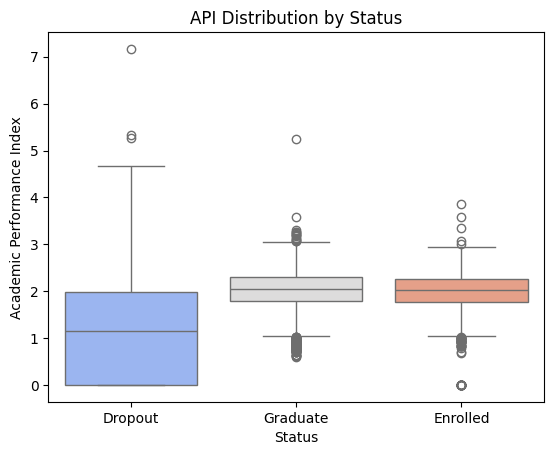

In [15]:
data['API'] = (
    (data['Curricular_units_1st_sem_grade'] + data['Curricular_units_2nd_sem_grade']) /
    (data['Curricular_units_1st_sem_enrolled'] + data['Curricular_units_2nd_sem_enrolled'])
)

sns.boxplot(x='Status', y='API', data=data, hue='Status', palette='coolwarm')
plt.title('API Distribution by Status')
plt.xlabel('Status')
plt.ylabel('Academic Performance Index')
plt.show()

Dari visualisasi bloxplot di atas, sangat jelas bahwa status Dropout memiliki Academic Performance Index yang lebih rendah dibangingkan dengan status yang lainnya.

#### Academic Performance Index by Admission Grade

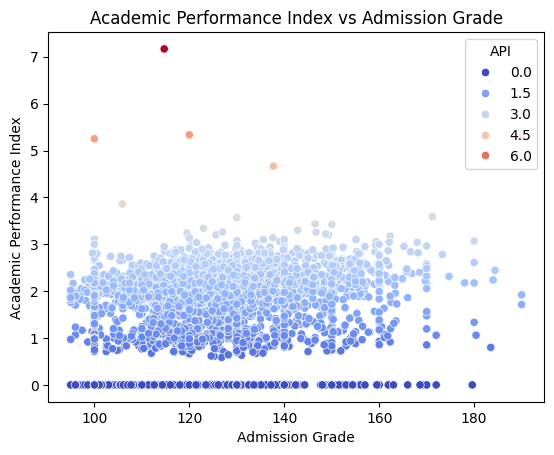

In [16]:
sns.scatterplot(x='Admission_grade', y='API', data=data, hue='API', palette='coolwarm')
plt.title('Academic Performance Index vs Admission Grade')
plt.xlabel('Admission Grade')
plt.ylabel('Academic Performance Index')
plt.show()

Dari visualisasi scatterplot di atas tidak terlihat hubungan signifikan antara Academic Performance Index dengan Admission Grade. Terlihat kebanyakan data berada di API 1-3.

#### Academic Performance Index by Daytime/Evening Attendance

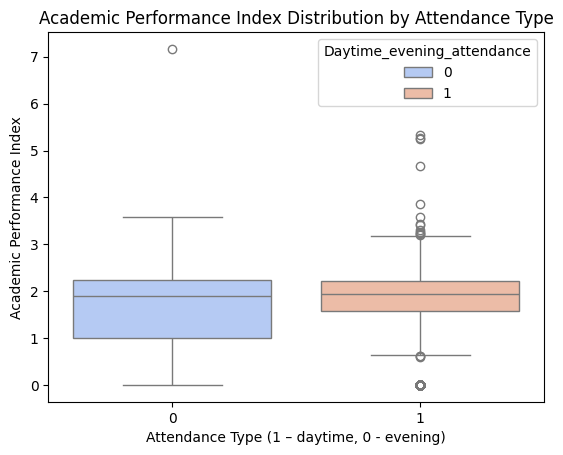

In [17]:
sns.boxplot(x='Daytime_evening_attendance', y='API', data=data, hue='Daytime_evening_attendance', palette='coolwarm')
plt.title('Academic Performance Index Distribution by Attendance Type')
plt.xlabel('Attendance Type (1 – daytime, 0 - evening)')
plt.ylabel('Academic Performance Index')
plt.show()

Visualisasi dengan boxplot di atas menunjukkan bahwa Attendance dengan Type evening ternyata memiliki Academic Performance Index yang lebih rendah dibandingkan dengan Attendeance type daytime.

# **3. Data Preparation**

## **3.1. Mengonversi Variabel Kategorikal dan Normalisasi Fitur**

Teknik Preprocessing yang Digunakan

1. Binary Encoding: Untuk mengubah variabel biner menjadi format numerik yang dapat digunakan oleh model ML tanpa menambahkan banyak dimensi seperti one-hot encoding untuk variabel biner. BinaryEncoder dari `category_encoders` mengubah satu kolom biner menjadi beberapa kolom biner yang mewakili nilai dalam bentuk biner.

2. One-Hot Encoding: Untuk mengubah variabel kategorikal menjadi representasi numerik yang tidak menyiratkan urutan atau hierarki antar kategori. OneHotEncoder dari `category_encoders` digunakan dengan `use_cat_names=True` untuk memberikan nama kolom yang deskriptif dan mudah dibaca.

3. Standard Scaling: Untuk normalisasi fitur numerik, memastikan semua fitur berkontribusi secara setara dalam training model tanpa satu fitur mendominasi karena skala yang berbeda. StandardScaler mengubah data sehingga nilai rata-rata menjadi 0 dan standar deviasi menjadi 1.

In [18]:
binary_columns = [
    "Daytime_evening_attendance", "Displaced", "Educational_special_needs", "Debtor",
    "Tuition_fees_up_to_date", "Gender", "Scholarship_holder", "International"
]

categorical_columns = [
    "Marital_status", "Application_mode", "Application_order", "Course",
    "Previous_qualification", "Nacionality"
]

numeric_columns = [
    "Previous_qualification_grade", "Admission_grade", "Age_at_enrollment",
    "Curricular_units_1st_sem_credited", "Curricular_units_1st_sem_enrolled",
    "Curricular_units_1st_sem_evaluations", "Curricular_units_1st_sem_approved",
    "Curricular_units_1st_sem_grade", "Curricular_units_1st_sem_without_evaluations",
    "Curricular_units_2nd_sem_credited", "Curricular_units_2nd_sem_enrolled",
    "Curricular_units_2nd_sem_evaluations", "Curricular_units_2nd_sem_approved",
    "Curricular_units_2nd_sem_grade", "Curricular_units_2nd_sem_without_evaluations",
    "Unemployment_rate", "Inflation_rate", "GDP"
]

# Pipelines preprocessing
binary_transformer = Pipeline(steps=[
    ('binary', ce.BinaryEncoder())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', ce.OneHotEncoder(use_cat_names=True))
])

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Setup preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('bin', binary_transformer, binary_columns),
        ('cat', categorical_transformer, categorical_columns),
        ('num', numeric_transformer, numeric_columns)
    ])

X = data.drop(columns=["Status", "Mothers_qualification", "Fathers_qualification", "Mothers_occupation", "Fathers_occupation"])
y = data['Status']

X[categorical_columns] = X[categorical_columns].apply(pd.to_numeric, errors='coerce')
X[categorical_columns] = X[categorical_columns].astype('category')

X = preprocessor.fit_transform(X)

feature_names = preprocessor.get_feature_names_out()
data_transformed = pd.DataFrame(X, columns=feature_names)

joblib.dump(preprocessor, 'preprocessor_model.joblib')

print("Ukuran dataset setelah transformasi:", data_transformed.shape)

Ukuran dataset setelah transformasi: (4424, 113)


Agar dimensi dataset tidak terlalu besar, kolom "Mothers_qualification", "Fathers_qualification", Mothers_occupation", "Fathers_occupation" dihapus dari dataset dengan harapan pada tahap modeling nantinya model lebih efektif dan efisien.

Dataset sekarang memiliki lebih banyak kolom yaitu 113 kolom setelah preprocessing di atas. Semua data kategorikal termasuk yang biner telah diubah menjadi bentuk numerik yang sesuai untuk input model ML.

Fitur numerik telah discaling, yang membantu dalam pembelajaran model dengan algoritma yang sensitif terhadap skala data. One-hot encoding untuk variabel kategorikal menghasilkan kolom baru, tetapi dengan manajemen yang baik untuk menghindari curse of dimensionality.

## **3.2. Split Data dan Oversampling Data dengan SMOTE**

Sebelum melakukan oversampling, data dibagi menjadi set pelatihan (train) dan set pengujian (test) dengan perbandingan 80:20 menggunakan train_test_split. Ini dilakukan sebelum SMOTE untuk menghindari data leakage atau kebocoran data. Test set harus tetap mencerminkan distribusi asli data.

Variabel target `Status` tidak seimbang. Oversampling dengan SMOTE menciptakan sampel sintetis untuk kelas minoritas, sehingga meningkatkan performa model. Oversampling menggunakan Synthetic Minority Oversampling Technique (SMOTE). Hanya data pelatihan yang di-resample dengan SMOTE untuk membuat dataset yang lebih seimbang tanpa mempengaruhi data uji.

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Distribution of target before SMOTE (Training set):")
print(y_train.value_counts())
print("\nDistribution of target after SMOTE (Training set):")
print(pd.Series(y_train_resampled).value_counts())

print("\nSize of training data after SMOTE:", X_train_resampled.shape)
print("Size of test data (unchanged):", X_test.shape)

Distribution of target before SMOTE (Training set):
Status
Graduate    1791
Dropout     1105
Enrolled     643
Name: count, dtype: int64

Distribution of target after SMOTE (Training set):
Status
Dropout     1791
Enrolled    1791
Graduate    1791
Name: count, dtype: int64

Size of training data after SMOTE: (5373, 113)
Size of test data (unchanged): (885, 113)


Sekarang memiliki distribusi kelas yang lebih seimbang, yang dapat membantu model untuk belajar dari kedua kelas dengan lebih adil. Tetapi data test tetap memiliki distribusi asli, memberikan evaluasi yang realistis tentang performa model pada data asli.

## **3.2. Encode Target/Label**

Karena kolom status yang sebagai target memiliki nilai string, maka perlu diubah jadi numerik agar bisa digunakan untuk proses modeling

In [20]:
# Menggunakan LabelEncoder untuk mengonversi label menjadi angka
label_encoder = LabelEncoder()
y_train_resampled_encoded = label_encoder.fit_transform(y_train_resampled)
y_test_encoded = label_encoder.fit_transform(y_test)

In [21]:
# Konversi ke Pandas Series dan hitung frekuensi masing-masing label
y_train_resampled_encoded_series = pd.Series(y_train_resampled_encoded)
y_test_encoded_series = pd.Series(y_test_encoded)

# Lihat distribusi kelas
print("Distribusi kelas pada y_train_resampled_encoded:")
print(y_train_resampled_encoded_series.value_counts())

print("\nDistribusi kelas pada y_test_encoded:")
print(y_test_encoded_series.value_counts())

Distribusi kelas pada y_train_resampled_encoded:
0    1791
1    1791
2    1791
Name: count, dtype: int64

Distribusi kelas pada y_test_encoded:
2    418
0    316
1    151
Name: count, dtype: int64


Sekarang target sudah berbentuk numerik dan siap untuk tahap modeling.

# **4. Modeling**

## **4.1. Pemilihan Algoritma**

Project ini akan menggunakan dua algoritma berikut:

1. **Random Forest (RF):**
   - Algoritma ensemble berbasis pohon keputusan yang kuat terhadap outlier dan non-linearitas.
   - Mengurangi overfitting dibandingkan pohon keputusan tunggal.

2. **XGBoost (XGB):**
   - Algoritma boosting berbasis gradien yang efisien.
   - Memiliki kemampuan bawaan untuk menangani ketidakseimbangan data dengan pengaturan **scale_pos_weight**.
   - Populer dalam industri karena kecepatan dan performa tinggi pada dataset dengan dimensi besar.

## **4.2. Proses Modeling**

### **4.2.1. Model Random Forest**

**Penjelasan Hyperparameter Random Forest**:
- **`n_estimators`**: Jumlah pohon (trees) yang digunakan dalam forest. Semakin banyak pohon, model akan lebih stabil, namun juga membutuhkan lebih banyak waktu untuk pelatihan.
- **`max_depth`**: Kedalaman maksimum dari setiap pohon. Pohon yang lebih dalam dapat menyebabkan overfitting, jadi semakin kecil nilai `max_depth`, model akan lebih sederhana.
- **`min_samples_split`**: Minimum jumlah sampel yang diperlukan untuk membagi node internal. Nilai yang lebih besar akan membantu mengurangi overfitting dengan membuat pohon lebih umum.
- **`min_samples_leaf`**: Minimum jumlah sampel yang diperlukan untuk membentuk sebuah leaf node. Nilai yang lebih besar akan membuat model lebih sederhana dan mengurangi overfitting.

In [22]:
rf_model = RandomForestClassifier(random_state=42)
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)
grid_search_rf.fit(X_train_resampled, y_train_resampled)

print("Best parameters for Random Forest:", grid_search_rf.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


Classification Report - Random Forest
              precision    recall  f1-score   support

     Dropout       0.85      0.75      0.79       316
    Enrolled       0.51      0.47      0.49       151
    Graduate       0.81      0.90      0.85       418

    accuracy                           0.77       885
   macro avg       0.72      0.71      0.71       885
weighted avg       0.77      0.77      0.77       885

Accuracy: 77.40%
Precision (Weighted): 77.20%
Recall (Weighted): 77.40%
F1 Score (Weighted): 77.05%


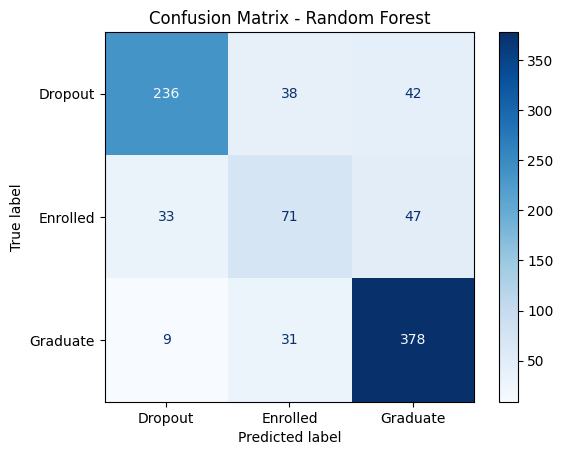

['best_rf_model.joblib']

In [23]:
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

# Classification report
print("Classification Report - Random Forest")
print(classification_report(y_test, y_pred_rf))

# Menghitung Metrik Evaluasi
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

# Output metrik
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision (Weighted): {precision * 100:.2f}%")
print(f"Recall (Weighted): {recall * 100:.2f}%")
print(f"F1 Score (Weighted): {f1 * 100:.2f}%")

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=['Dropout', 'Enrolled', 'Graduate'])
disp_rf.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

joblib.dump(best_rf_model, 'best_rf_model.joblib')

### **4.2.2. Model XGBoost**

**Penjelasan hyperparameter XGBoost**:
- **`n_estimators`**: Jumlah boosting rounds (atau trees) yang akan dilatih. Semakin banyak pohon, model mungkin akan lebih akurat, tetapi juga bisa mengalami overfitting dan pelatihan yang lebih lama.
- **`max_depth`**: Kedalaman maksimum dari pohon yang dibuat dalam boosting. Semakin dalam pohon, semakin besar risiko overfitting, jadi nilai ini sering kali disesuaikan agar tidak terlalu dalam.
- **`subsample`**: Prosentase data yang digunakan untuk setiap boosting round. Nilai yang lebih rendah dapat membantu mengurangi overfitting dengan memperkenalkan elemen keacakan pada model.
- **`colsample_bytree`**: Fraksi fitur yang digunakan untuk setiap pohon. Mengurangi nilai ini dapat membantu menghindari overfitting dan membuat model lebih robust.

In [24]:
# xgb_model = XGBClassifier(random_state=42)
xgb_model = XGBClassifier(
    objective='multi:softmax', num_class=3, random_state=42
)
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 6, 10],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

grid_search_xgb = GridSearchCV(estimator=xgb_model, param_grid=param_grid_xgb, cv=5, n_jobs=-1, verbose=2)
grid_search_xgb.fit(X_train_resampled, y_train_resampled_encoded)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters for XGBoost: {'colsample_bytree': 0.8, 'max_depth': 10, 'n_estimators': 100, 'subsample': 0.8}


Classification Report - XGBoost
              precision    recall  f1-score   support

           0       0.83      0.73      0.78       316
           1       0.47      0.40      0.43       151
           2       0.79      0.91      0.85       418

    accuracy                           0.76       885
   macro avg       0.70      0.68      0.68       885
weighted avg       0.75      0.76      0.75       885

Accuracy: 75.71%
Precision (Weighted): 75.02%
Recall (Weighted): 75.71%
F1 Score (Weighted): 74.99%


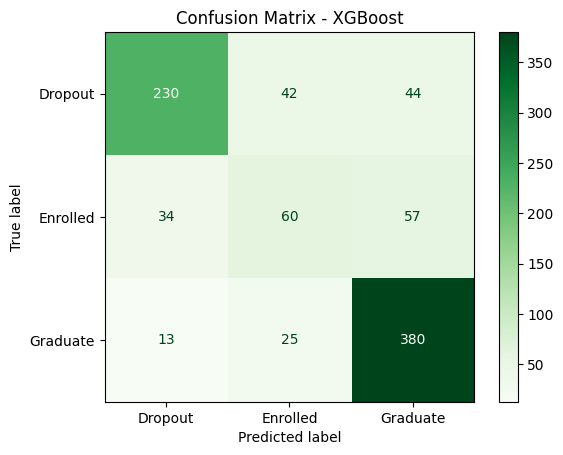

['best_xgb_model.joblib']

In [25]:
best_xgb_model = grid_search_xgb.best_estimator_
y_pred_xgb = best_xgb_model.predict(X_test)

# Classification report
print("Classification Report - XGBoost")
print(classification_report(y_test_encoded, y_pred_xgb))

# Menghitung Metrik Evaluasi
accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
precision = precision_score(y_test_encoded, y_pred_xgb, average='weighted')
recall = recall_score(y_test_encoded, y_pred_xgb, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_xgb, average='weighted')

# Output metrik
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision (Weighted): {precision * 100:.2f}%")
print(f"Recall (Weighted): {recall * 100:.2f}%")
print(f"F1 Score (Weighted): {f1 * 100:.2f}%")

# Confusion Matrix
cm_xgb = confusion_matrix(y_test_encoded, y_pred_xgb)
disp_xgb = ConfusionMatrixDisplay(confusion_matrix=cm_xgb, display_labels=['Dropout', 'Enrolled', 'Graduate'])
disp_xgb.plot(cmap='Greens')
plt.title("Confusion Matrix - XGBoost")
plt.show()

joblib.dump(best_xgb_model, 'best_xgb_model.joblib')

# **5. Evaluasi Model**

Evaluasi dilakukan menggunakan metrik berikut:

1. **Accuracy**: Akurasi adalah persentase dari semua prediksi yang benar (baik positif maupun negatif) dibandingkan dengan total prediksi yang dibuat. Ini memberikan gambaran umum performa model tetapi bisa menyesatkan jika dataset tidak seimbang.

   $$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

2. **Precision**: Presisi mengukur seberapa akurat model dalam mengidentifikasi kasus positif. Ini menunjukkan proporsi dari kasus yang diprediksi positif yang sebenarnya positif.

   $$ \text{Precision} = \frac{TP}{TP + FP} $$

3. **Recall**: Recall mengukur kemampuan model untuk menemukan semua kasus positif yang ada dalam dataset. Ini adalah proporsi dari kasus positif yang benar-benar diidentifikasi oleh model.

   $$ \text{Recall} = \frac{TP}{TP + FN} $$

4. **F1-Score**: F1-Score adalah rata-rata harmonis dari presisi dan recall, memberikan skor tunggal yang mencerminkan keseimbangan antara keduanya. Berguna ketika ingin melihat performa model di kedua metrik tersebut.

   $$ \text{F1-Score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}} $$


## **5.1. Perbandingan Model**

| **Metrik**       | **Random Forest** | **XGBoost**   |
|------------------|-------------------|---------------|
| **Accuracy**     |       77.40%      | 75.71%        |
| **Precision**    |       77.20%      | 75.02%        |
| **Recall**       |       77.40%      | 75.71%        |
| **F1-Score**     |       77.05%      | 74.99%        |

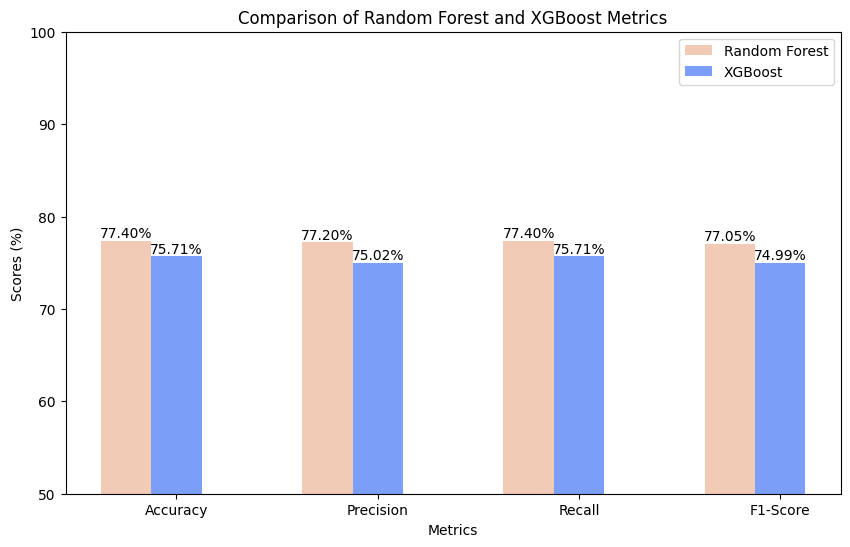

In [26]:
# Data
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
rf_scores = [77.40, 77.20, 77.40, 77.05]
xgb_scores = [75.71, 75.02, 75.71, 74.99]

x = np.arange(len(metrics))
width = 0.25

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
color_rf = plt.cm.coolwarm(0.2)
color_xgb = plt.cm.coolwarm(0.8)

bar1 = ax.bar(x - width, rf_scores, width, label='Random Forest', color=plt.cm.coolwarm(0.6))
bar2 = ax.bar(x, xgb_scores, width, label='XGBoost', color=plt.cm.coolwarm(0.2))

for i, v in enumerate(rf_scores):
    ax.text(x[i] - width, v, f'{v:.2f}%', ha='center', va='bottom')
for i, v in enumerate(xgb_scores):
    ax.text(x[i], v, f'{v:.2f}%', ha='center', va='bottom')

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores (%)')
ax.set_title('Comparison of Random Forest and XGBoost Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()
plt.ylim(50, 100)
plt.show()

Hasil perbandingan kinerja metrik di atas menunjukkan bahwa:

- **Random Forest** menunjukkan kinerja yang lebih baik dibandingkan dengan **XGBoost** pada semua metrik evaluasi (Accuracy, Precision, Recall, F1-Score).  
  - Accuracy **77.40%** pada Random Forest lebih tinggi dibandingkan XGBoost yang hanya mencapai **75.71%**.  
  - Precision dan Recall juga lebih baik pada Random Forest, masing-masing **77.20%** dan **77.40%**, dibandingkan XGBoost (**75.02%** dan **75.71%**).  
  - **F1-Score**, yang merupakan rata-rata harmonis antara Precision dan Recall, menunjukkan hasil serupa dengan **77.05%** untuk Random Forest dibandingkan **74.99%** untuk XGBoost.  
- **XGBoost** cenderung memiliki kinerja yang lebih rendah meskipun memiliki parameter yang dioptimasi dengan teknik hyperparameter tuning.  

## **5.2. Kesimpulan Modeling**

- Berdasarkan metrik evaluasi, **Random Forest** adalah model terbaik untuk kasus ini karena memberikan performa lebih tinggi di semua metrik utama.  
- Parameter optimal untuk Random Forest adalah:
  - `max_depth`: None
  - `min_samples_leaf`: 1
  - `min_samples_split`: 2
  - `n_estimators`: 100
- Meski XGBoost memiliki parameter optimal seperti `colsample_bytree: 0.8` dan `max_depth: 10`, performanya belum dapat mengungguli Random Forest.  

### **Rekomendasi**
Karena Random Forest menunjukkan performa yang lebih baik, model ini direkomendasikan untuk digunakan dalam implementasi atau produksi. Meski performa XGBoost lebih rendah, eksplorasi lebih lanjut pada parameter seperti learning_rate atau gamma mungkin dapat meningkatkan hasilnya.